# Setup

## Evaluations
- Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.
> AUC score

## Formats 

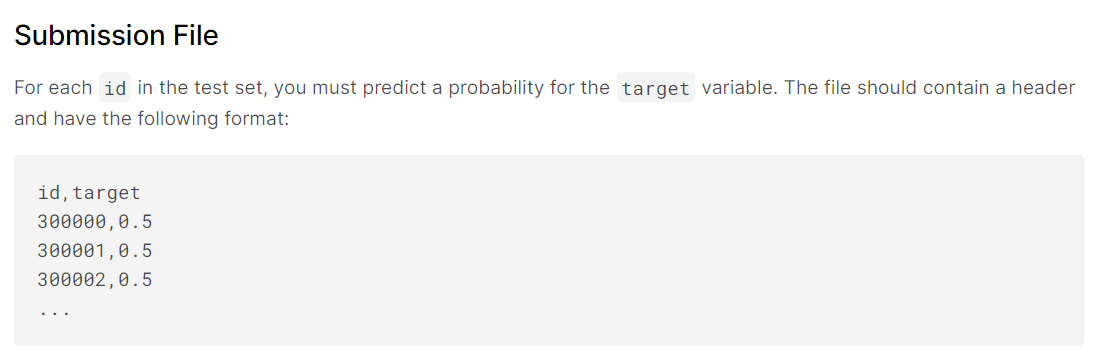

0.5로 초기화되어있음 

## 변수 설명

인위적으로 만든 데이터이기 때문에 각 피처와 타깃값의 의미를 알 수 없다.

## 특징 

1. 제공되는 변수는 모두 범주형
    - 이진 변수(bin_으로 시작), 순서형 데이터(ord_으로 시작), 명목형 데이터(nom_으로 시작), 날짜 데이터(day, month) 등 다양한 데이터가 있음 
  
    - ord_3, ord_4, ord_5는 알파벳 순으로 고윳값 순서를 매겼음

# EDA 

## library

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['font.family'] = 'Malgun Gothic'

import seaborn as sns 


## load data 

In [2]:
pd.read_csv('dataset/train.csv')

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,0,0,0,T,N,Red,Trapezoid,Snake,India,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,...,ab0ce192b,1,Master,Boiling Hot,h,W,uJ,3,8,1


In [4]:
train = pd.read_csv('dataset/train.csv', index_col = 'id')
test = pd.read_csv('dataset/test.csv', index_col = 'id')
submission = pd.read_csv('dataset/sample_submission.csv', index_col = 'id')

In [7]:
print(train.shape)
print(test.shape)

(300000, 24)
(200000, 23)


In [13]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


## feature summary

In [19]:
pd.DataFrame(train.dtypes, columns = ['데이터 타입']).reset_index()

,index,데이터 타입
0,bin_0,int64
1,bin_1,int64
2,bin_2,int64
3,bin_3,object
4,bin_4,object
5,nom_0,object
6,nom_1,object
7,nom_2,object
8,nom_3,object
9,nom_4,object


In [26]:
def resumetable(df) :
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index' : '피처'})
    summary['결측값 수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['1번째 값'] = df.loc[0].values
    summary['2번째 값'] = df.loc[1].values
    summary['3번째 값'] = df.loc[2].values
    
    return summary

In [27]:
resumetable(train)[resumetable(train)['피처']]

데이터셋 형상 : (300000, 24)


,피처,데이터 타입,결측값 수,고윳값 개수,1번째 값,2번째 값,3번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


- 이진 피처 : bin_3(T/F), bin_4(Y/N) 을 0, 1로 인코딩

- 명목형 피처 : object 타입이고, nom_5~nom_9는 의미를 파악하기 어려운 값들이 입력되어 있다.

- 순서형 피처 : **순서가 중요하다.** 순서에 유의하며 인코딩 해야함 


순서를 파악하기 위해 순서형 피처의 고유값 출력

In [30]:
for i in range(3) : 
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


- ord_0은 숫자이기 때문에 숫자 크기에 맞춰 순서를 맞추면 됨 

- ord_1은 캐글 등급이기 때문에 Novice, Contributor, Expert, Master, Grandmaster 순으로 

- ord_2는 춥고 더운 정도이기 때문에 Freezing, Cold, Warm, Hot, Boiling Hot, Lava Hot 순으로

ord_3, ord_4, ord_5 확인 

In [31]:
for i in range(3, 6) : 
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_3 고윳값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

알파벳 순으로 정렬 

일, 월, 타깃값 확인

In [32]:
for feature in ['day' ,'month', 'target'] : 
    print(f'{feature} 고윳값 : {train[feature].unique()}')

day 고윳값 : [2 7 5 4 3 1 6]
month 고윳값 : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값 : [0 1]


## Visualization

In [35]:
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Target Distribution')

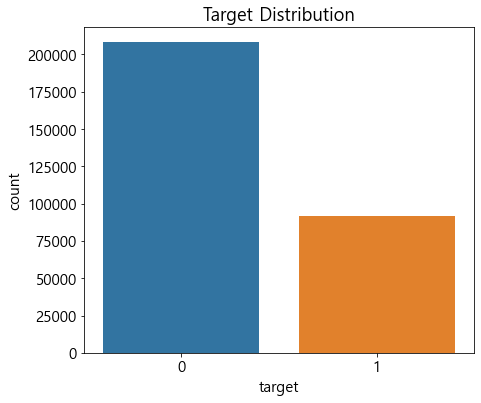

In [36]:
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))

# 타깃값 분포 
ax = sns.countplot(x = 'target', data = train)
ax.set_title('Target Distribution')

**비율을 그래프 상단에 표시**
- ax.patches 이용 
    - ax축을 구성하는 그래프 도형 객체 모두를 담은 리스트

In [37]:
print(ax.patches)

[<matplotlib.patches.Rectangle object at 0x00000120A46AC160>, <matplotlib.patches.Rectangle object at 0x00000120A46AC3D0>]


타깃값 비율을 표시할 위치를 찾기 위해 사각형의 높이, 너비, 왼쪽 테두리의 x축 위치 계산 

In [40]:
rectangle = ax.patches[0] # 첫 번째 사각형 객체
print(f'사각형 높이 : {rectangle.get_height()}')
print(f'사각형 너비 : {rectangle.get_width()}')
print(f'사각형 왼쪽 테두리 x좌표 : {rectangle.get_x()}')

rectangle = ax.patches[1] # 첫 번째 사각형 객체
print(f'사각형 높이 : {rectangle.get_height()}')
print(f'사각형 너비 : {rectangle.get_width()}')
print(f'사각형 왼쪽 테두리 x좌표 : {rectangle.get_x()}')


사각형 높이 : 208236
사각형 너비 : 0.8
사각형 왼쪽 테두리 x좌표 : -0.4
사각형 높이 : 91764
사각형 너비 : 0.8
사각형 왼쪽 테두리 x좌표 : 0.6


In [42]:
print(f'1번째 텍스트 위치의 x좌표 : {ax.patches[0].get_x() + ax.patches[0].get_width()/2}')
print(f'1번째 텍스트 위치의 y좌표 : {ax.patches[0].get_height() + len(train) * 0.001}')

print(f'2번째 텍스트 위치의 x좌표 : {ax.patches[1].get_x() + ax.patches[0].get_width()/2}')
print(f'2번째 텍스트 위치의 y좌표 : {ax.patches[1].get_height() + len(train) * 0.001}')

1번째 텍스트 위치의 x좌표 : 0.0
1번째 텍스트 위치의 y좌표 : 208536.0
2번째 텍스트 위치의 x좌표 : 1.0
2번째 텍스트 위치의 y좌표 : 92064.0


**비율을 표시해주는 코드 함수로 구현**

Text(0.5, 1.0, 'Target Distribution with Percentage')

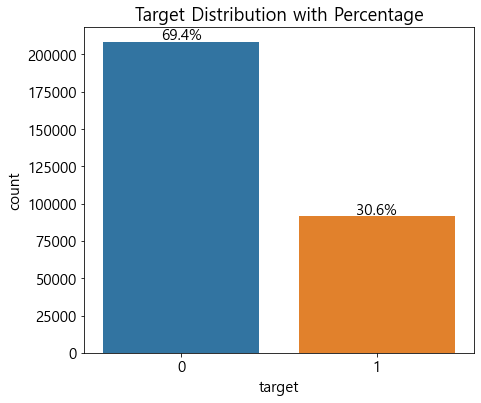

In [46]:
def write_percent(ax, total_size) : 
    for patch in ax.patches : 
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100
        
        ax.text(x = left_coord + width/2, 
                y = height + 0.01 * height,
                s = f'{percent:1.1f}%',
                ha = 'center')
        
plt.figure(figsize = (7, 6))

ax = sns.countplot(x = 'target', data = train) 
write_percent(ax, len(train))
ax.set_title('Target Distribution with Percentage')
        
        

## 이진 피처 분포

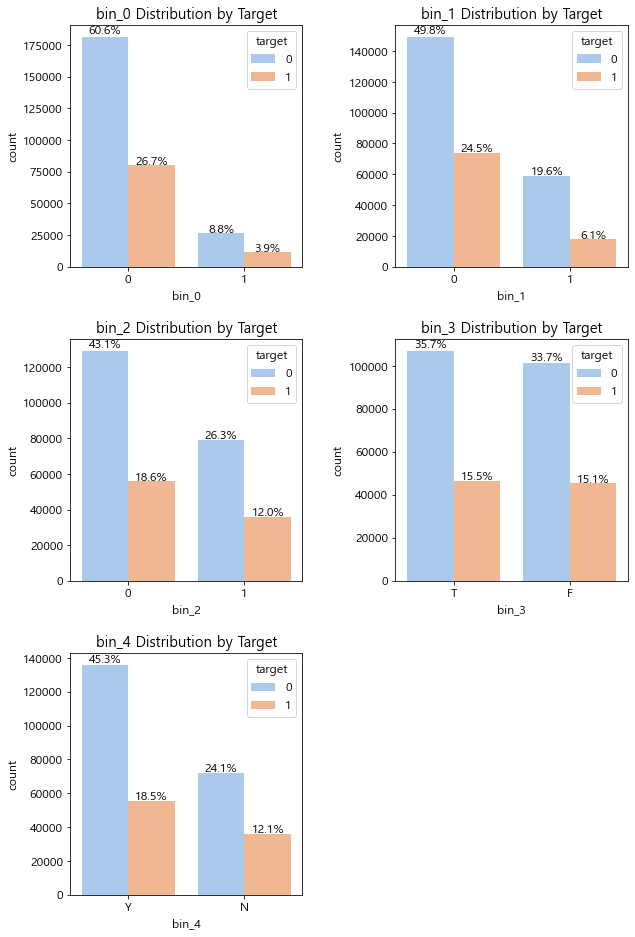

In [47]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3, 2)
plt.figure(figsize = (10, 16))

# subplot간 여백
plt.subplots_adjust(wspace = 0.4,  hspace = 0.3)

# subplot 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features) :
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x = feature, 
                  data = train, 
                  hue = 'target', 
                  palette = 'pastel', 
                  ax = ax)
    
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

이진 변수의 경우 클래스 별 타깃값의 비율이 비슷한 것을 알 수 있음 

## 명목형 피처 분포

1. crosstab 생성 
2. pointplot 생성 함수 만들기
3. 피처 분포도 및 pointplot 생성 함수 만들기

### step 1 : crosstab 생성

In [48]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize = 'index') * 100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [49]:
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [50]:
def get_crosstab(df, feature) :
    crosstab = pd.crosstab(df[feature], df['target'], normalize = 'index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

### step 2 : pointplot 생성 함수 만들기

In [52]:
def plot_pointplot(ax, feature, crosstab) : 
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성 
    
    # 새로운 축에 pointplot 그리기
    ax2 = sns.pointplot(x = feature, y = 1, data = crosstab, 
                        order = crosstab[feature].values,
                        color = 'black',  
                        legend = False)
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위
    ax2.set_ylabel('Target 1 Ratio(%)')
    

### step 3 : 피처 분포도 및 피처별 타깃값 1의 비율 pointplot 생성 함수 만들기

In [55]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size = (15, 20)) : 
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.45, hspace = 0.3) 
    
    for idx, feature in enumerate(features) :
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        # ax축에 타깃값 분포 countplot 그리기 
        sns.countplot(x = feature, data = df, 
                      order = crosstab[feature].values,
                      color = 'skyblue', 
                      ax = ax)
        
        write_percent(ax, len(df))
        
        plot_pointplot(ax, feature, crosstab)
        
        ax.set_title(f'{feature} Distribution')

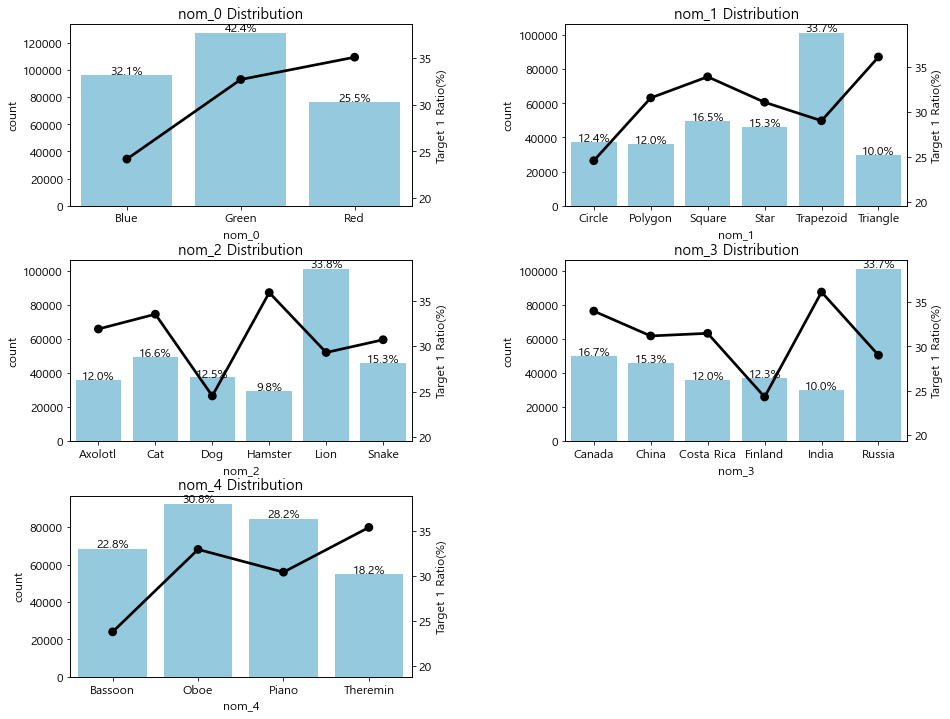

In [66]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows = 3, num_cols = 2,
                             size = (15, 12))

명목형 피처의 경우 고유값별 타깃 비율이 서로 다르다.
> 이는 타깃값에 대한 예측 능력이 있음을 의미한다.

**순서가 중요하지 않고, 고유값 개수도 적기 때문에 원-핫 인코딩을 수행**

nom_5 ~ nom_9는 시각화를 하기에 고유값이 너무 많기 때문에 우선 유의한 변수라고 가정하고 모델링에 사용

## 순서형 피처 분포

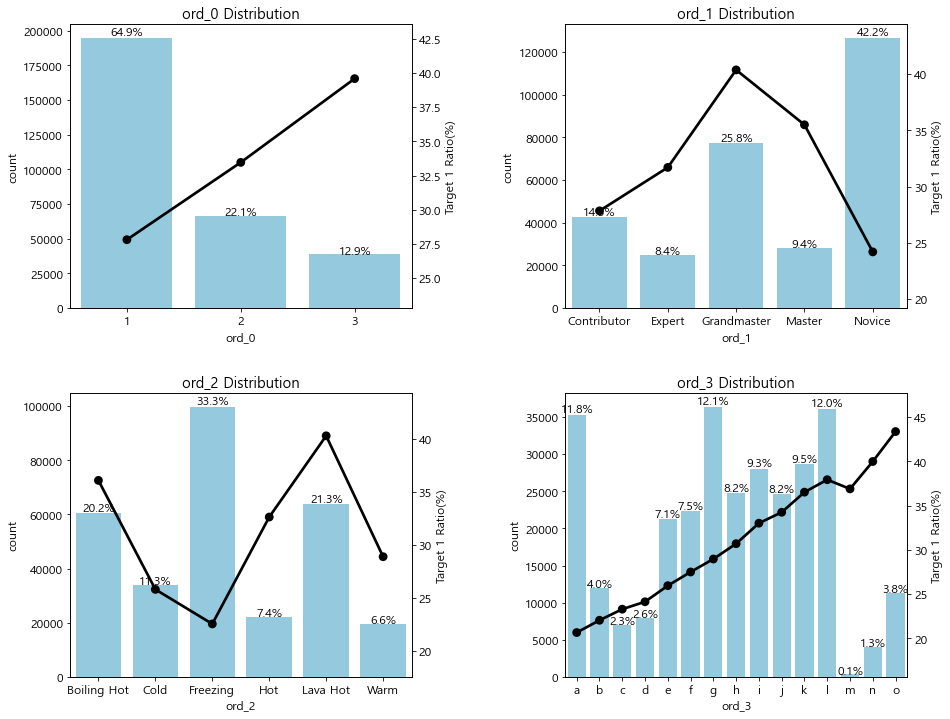

In [65]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows = 2, num_cols = 2,
                              size = (15, 12))

ord_1, ord_2는 피처 값들의 순서가 정렬되지 않았기 때문에 정렬해줘야 함 
> `CategoricalDtype()`을 이용하면 순서 지정 가능

In [67]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입 
ord_1_dtype = CategoricalDtype(categories = ord_1_value, ordered = True)
ord_2_dtype = CategoricalDtype(categories = ord_2_value, ordered = True)

# 데이터 타입 변경 
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

정렬된 데이터를 활용해 그래프 그려보기

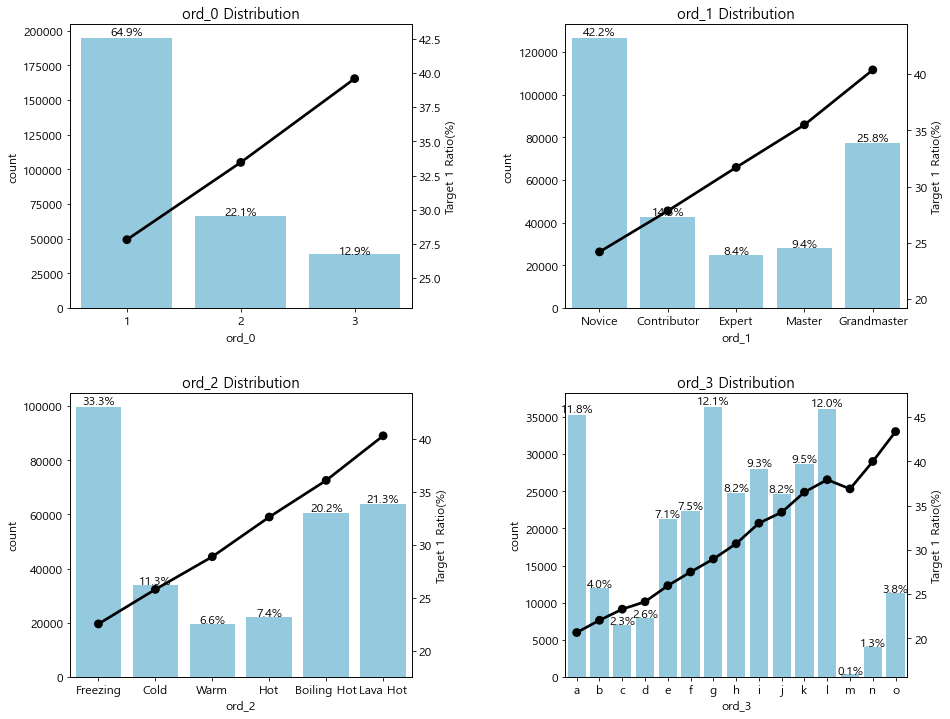

In [68]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows = 2, num_cols = 2,
                              size = (15, 12))

순서에 따라서 타깃값 1비율도 비례해서 커진다는 것을 알 수 있음

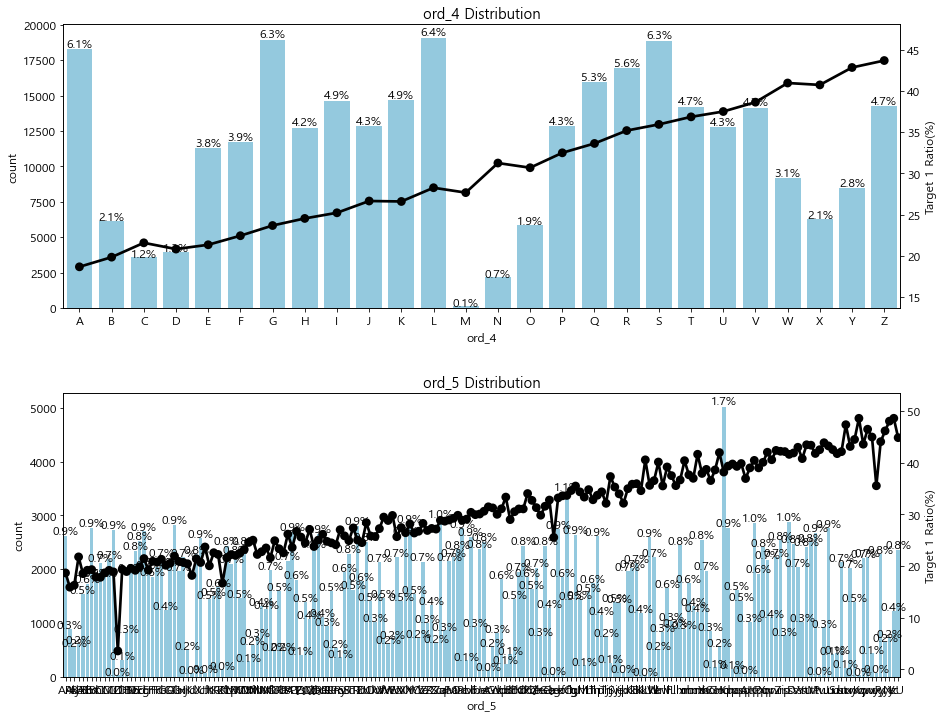

In [69]:
ord_features = ['ord_4', 'ord_5']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows = 2, num_cols = 1,
                              size = (15, 12))

ord_4, ord_5도 마찬가지로 순서에 따라 타깃값 1비율이 증가하는 것을 볼 수 있다.
> 모든 변수 사용 

## 날짜 피처 분포

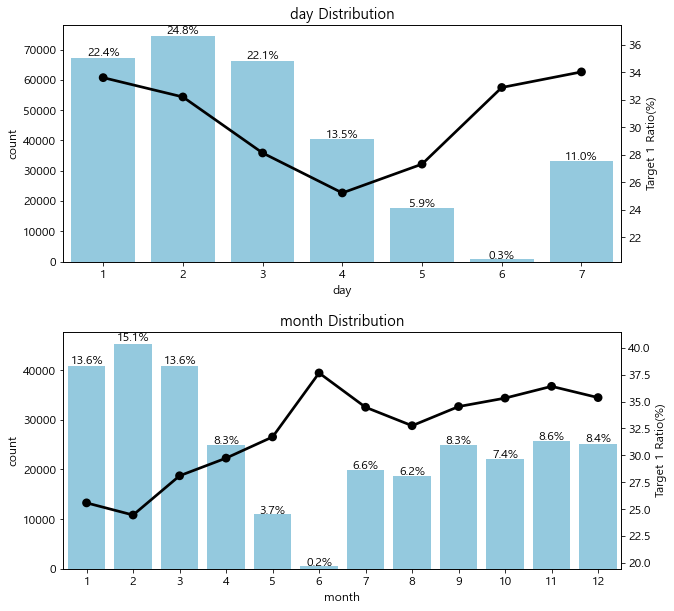

In [71]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows = 2, num_cols = 1,
                              size = (10, 10))

요일, 월 모두 이웃한 값과 유사하기 때문에 머신러닝 모델은 이웃한 값을 비슷한 값이라고 여긴다.
> 요일에서 1과 7, 월에서 1과 12도 유사하지만 비슷하게 보지 않는다. 이를 해결하기 위해 삼각함수를 사용해 인코딩하면 시작과 끝이 매끄럽게 연결되어 이러한 문제가 해결된다. 이러한 방법도 고려해 볼 필요가 있다.
